In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, timedelta

In [18]:
# --- Generate synthetic data ---
brands = ['Apple', 'Samsung', 'Google', 'Microsoft']
sentiments = ['Positive', 'Negative', 'Neutral']

np.random.seed(42)
num_rows = 1000
start_date = datetime(2024, 1, 1)

data = {
    'tweet_id': range(1, num_rows + 1),
    'brand': np.random.choice(brands, num_rows),
    'sentiment': np.random.choice(sentiments, num_rows, p=[0.5, 0.3, 0.2]),
    'likes': np.random.poisson(20, num_rows),
    'retweets': np.random.poisson(5, num_rows),
    'date': [start_date + timedelta(days=int(x)) for x in np.random.randint(0, 180, num_rows)],
}

df = pd.DataFrame(data)

In [19]:
df

,tweet_id,brand,sentiment,likes,retweets,date
0,1,Google,Negative,20,5,2024-06-04
1,2,Microsoft,Negative,18,3,2024-04-07
2,3,Apple,Positive,21,3,2024-04-20
3,4,Google,Neutral,21,6,2024-01-01
4,5,Google,Negative,31,6,2024-02-10
...,...,...,...,...,...,...
995,996,Apple,Negative,12,4,2024-03-18
996,997,Apple,Negative,24,1,2024-06-15
997,998,Microsoft,Positive,20,6,2024-03-30
998,999,Microsoft,Positive,18,1,2024-01-08


In [20]:
# --- Prepare data for animation ---
# Convert date to month-year format for animation frames
df['month'] = df['date'].dt.to_period('M').astype(str)

# Group data by month, brand, and sentiment and count tweets
grouped = df.groupby(['month', 'brand', 'sentiment']).size().reset_index(name='tweet_count')

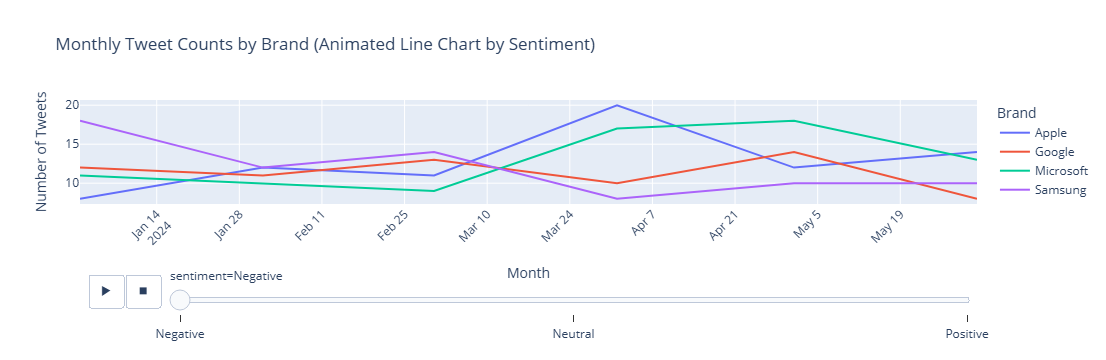

In [21]:
# --------- 1. Animated Line Chart ---------
fig_line = px.line(
    grouped,
    x='month',
    y='tweet_count',
    color='brand',
    line_group='sentiment',
    animation_frame='sentiment',
    title='Monthly Tweet Counts by Brand (Animated Line Chart by Sentiment)',
    labels={'month': 'Month', 'tweet_count': 'Number of Tweets', 'brand': 'Brand'}
)
fig_line.update_layout(xaxis=dict(tickangle=-45))
fig_line.show()


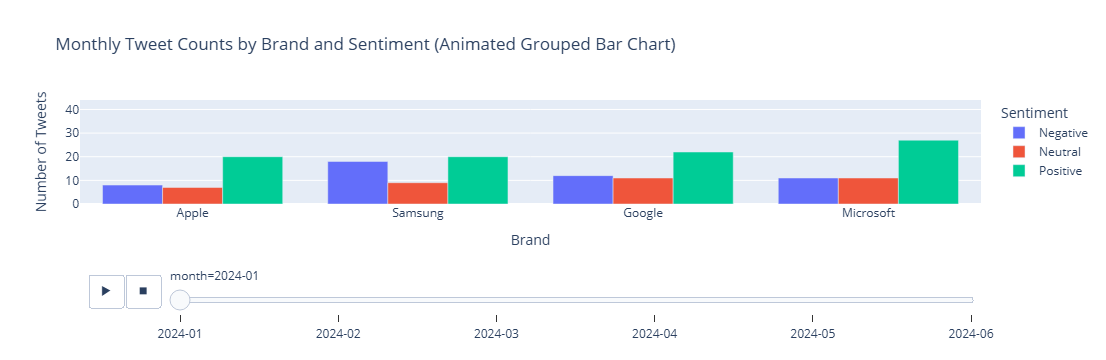

In [22]:
# --------- 2. Animated Grouped Bar Chart ---------
fig_bar = px.bar(
    grouped,
    x='brand',
    y='tweet_count',
    color='sentiment',
    barmode='group',
    animation_frame='month',
    title='Monthly Tweet Counts by Brand and Sentiment (Animated Grouped Bar Chart)',
    labels={'tweet_count': 'Number of Tweets', 'brand': 'Brand', 'sentiment': 'Sentiment'},
    category_orders={'brand': brands}
)
fig_bar.update_layout(yaxis=dict(range=[0, grouped['tweet_count'].max() + 10]))
fig_bar.show()
